<a href="https://colab.research.google.com/github/enockmwizerwa123/Data-Visualization/blob/main/Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplot inline
import warnings
warnings.filterwarnings("ignore")

In [37]:
#load the data and display first 5 rows
data = pd.read_csv('/content/homicide-data.csv',encoding='unicode escape')
data

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest
...,...,...,...,...,...,...,...,...,...,...,...,...
52174,Was-001380,20160908,WILLIAMS,EVAN,Black,29,Male,Washington,DC,38.828704,-77.002075,Closed by arrest
52175,Was-001381,20160913,SMITH,DEON,Black,19,Male,Washington,DC,38.822852,-77.001725,Open/No arrest
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23,Male,Washington,DC,38.828025,-77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24,Male,Washington,DC,38.820476,-77.008640,Open/No arrest


<h1> <center> Data Preprocessing

In [38]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            52179 non-null  object 
 1   reported_date  52179 non-null  int64  
 2   victim_last    52178 non-null  object 
 3   victim_first   52179 non-null  object 
 4   victim_race    52179 non-null  object 
 5   victim_age     52179 non-null  object 
 6   victim_sex     52179 non-null  object 
 7   city           52179 non-null  object 
 8   state          52179 non-null  object 
 9   lat            52119 non-null  float64
 10  lon            52119 non-null  float64
 11  disposition    52179 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


In [39]:
#check the size of dataset
data.shape

(52179, 12)

In [6]:
#look for number of null values in each entity
data.isnull().sum()

uid               0
reported_date     0
victim_last       1
victim_first      0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64

In [40]:
#Feature engineering
data.state.unique()

array(['NM', 'GA', 'MD', 'LA', 'AL', 'MA', 'NY', 'NC', 'IL', 'OH', 'TX',
       'CO', 'MI', 'CA', 'IN', 'FL', 'MO', 'NV', 'KY', 'TN', 'wI', 'MN',
       'OK', 'NE', 'PA', 'AZ', 'VA', 'DC'], dtype=object)

In [41]:
#create the dictionary
dict ={'NM': 'New Mexico','GA': 'Georgia','MD': 'Maryland','LA': 'Louisiana',
'AL': 'Alabama','MA': 'Massachusetts','NY': 'New York','NC': 'North Carolina','IL':'Illonois',
'OH': 'Ohio','TX': 'Texas','CO': 'Colorado','MI': 'Michigan','CA': 'California','IN':'Indiana',
'FL': 'Florida', 'OK' : 'Oklahoma', 'PA' : 'Pennsylvania', 'NE' : 'Nebraska', 'AZ':'Arizona',
'VA': 'Virginia', 'MO' : 'Missouri', 'DC' : 'District of Columbia', 'NV' : 'Neva','TN': 'Tennessee', 'wI' : 'Wisconsin', 'MN' : 'Minnesota'}

In [42]:
data['state'].replace(dict,inplace=True)

In [43]:
data.state.unique()

array(['New Mexico', 'Georgia', 'Maryland', 'Louisiana', 'Alabama',
       'Massachusetts', 'New York', 'North Carolina', 'Illonois', 'Ohio',
       'Texas', 'Colorado', 'Michigan', 'California', 'Indiana',
       'Florida', 'Missouri', 'Neva', 'KY', 'Tennessee', 'Wisconsin',
       'Minnesota', 'Oklahoma', 'Nebraska', 'Pennsylvania', 'Arizona',
       'Virginia', 'District of Columbia'], dtype=object)

In [44]:
#drop unwanted columns
data.drop(['victim_first','victim_last'],axis =1, inplace = True)

<h3> <center> Data Exploration

**Q1. Which state has the highest numbers of cases?**

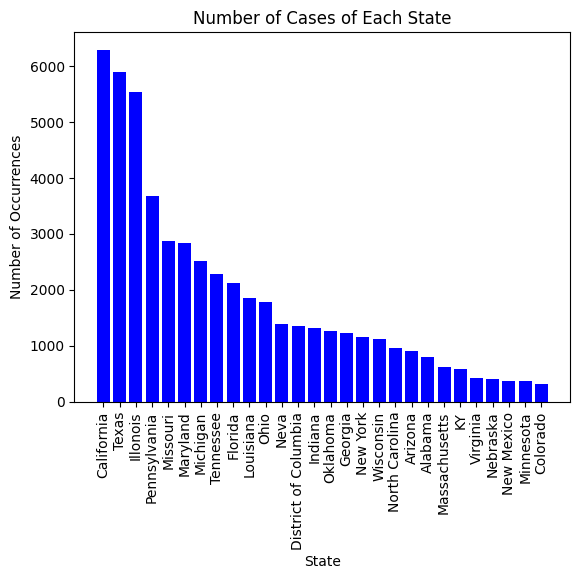

In [45]:
# Get the number of occurrences of each state
n_occurrences = data['state'].value_counts()
# Get bar names
bar_names = n_occurrences.index.astype(str).to_list()
# Get maximum bar name string lengths
max_name_length = 0
for name in bar_names:
 max_name_length = max(max_name_length, len(name))
# Get total number of bars
n_bars = len(bar_names)
# Create a bar chart of the number of occurrences of each state
plt.bar(n_occurrences.index, n_occurrences.values, color= 'blue')
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.title('Number of Cases of Each State')
plt.xticks(rotation=90)
plt.show();

As we can see Califonia has more cases compared to to rest of the other cities it is followed by texas and ilinois wheresa colorado has less than 1000 cases

**Q2. what is the distribution of disposition status?**

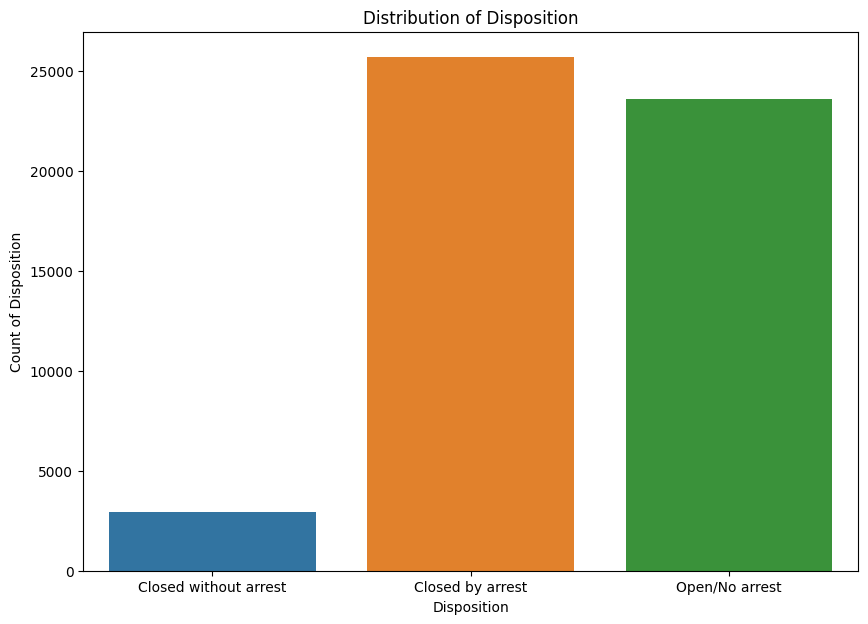

In [46]:
# Create a bar chart of the distribution of disposition of total cases
plt.figure(figsize=(10, 7))
sns.countplot(x='disposition', data=data)
plt.title("Distribution of Disposition")
plt.xlabel('Disposition')
plt.ylabel('Count of Disposition')
plt.show()

Although  there are the lots of cases which have been closed with arrests made, on other hand it is noted that there are most equivalent number of cases were still open with no arrest made yet.


**Q3. Highest homicide rates by race**


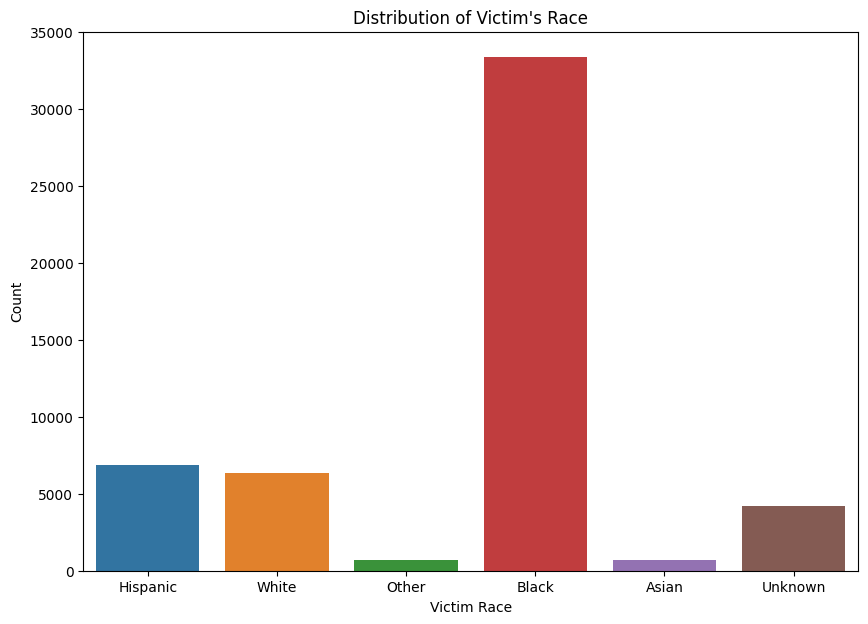

In [47]:
# Create a bar chart of the distribution of victims race
plt.figure(figsize=(10, 7))
sns.countplot(x = 'victim_race', data=data)
plt.title("Distribution of Victim's Race")
plt.xlabel('Victim Race')
plt.ylabel('Count')
plt.show();

A very high number of homicide victims were black, this number is quite alarming. It
could be seen that almost 35,000 victims were of black descendents.

**Q4. Highest homicide rates by gender**

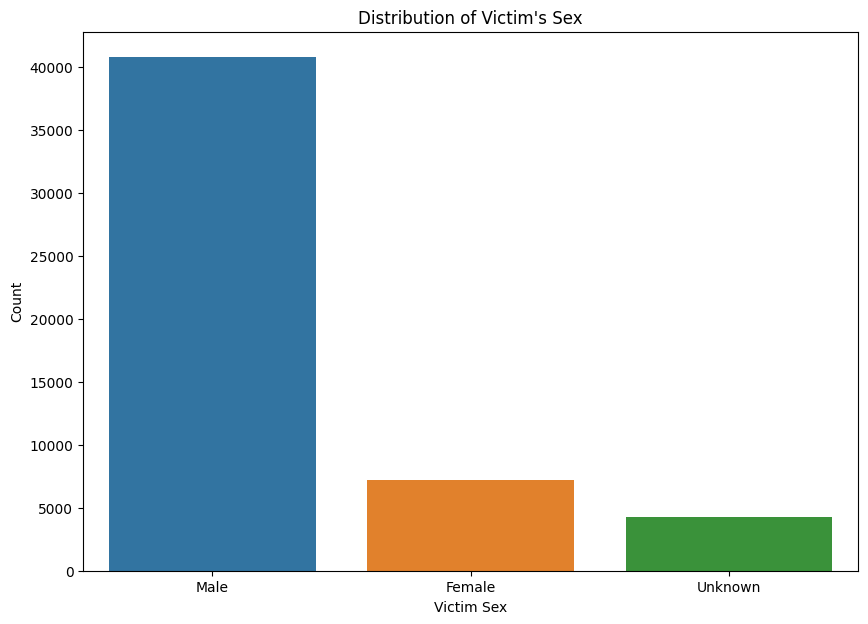

In [48]:
# Create a bar chart of the distribution of victims sex
plt.figure(figsize=(10, 7))
sns.countplot(x='victim_sex', data=data)
plt.title("Distribution of Victim's Sex")
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show();

Homicides rate is higher in males compared to females

**Q5. What age range or age group has the highest number of homicide victims**


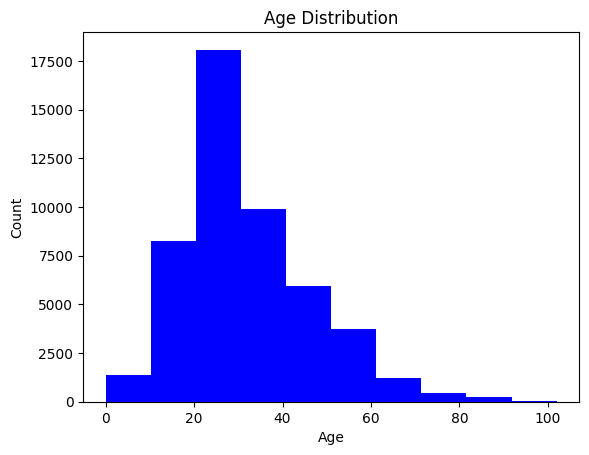

In [49]:
# convert the victim's age to numeric, in order to get a distribution
data['victim_age'] = pd.to_numeric(data['victim_age'], errors='coerce')
#plot the histogram chart using bins of 10 to display age distribution
plt.hist(data['victim_age'], bins=10, color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show();


We can see that most victims are young to middle-aged. Looks more like people in their
30s are a target.


**Data Quality Issue(s)**


Some rows had to be dropped due to missing data, and information on some victims
was not provided and marked as unknown to avoid assumptions. This highlights
potential data quality issues that need addressing.

**Recommendations**


1. Address data quality issues to ensure more accurate and comprehensive reporting.
This includes reducing missing information and standardizing data collection
processes.
2.Given the significant number of Black victims, consider targeted interventions and
community engagement initiatives in areas with higher homicide rates to address root
causes and reduce disparities.
3. Develop outreach programs and support systems for young adults, especially those
in their 30s, to help reduce their vulnerability to homicides.
4. Continue efforts to close open cases and make arrests. Implement proactive policing
strategies to deter potential offenders.
5. Given the fluctuation in reporting over the years, establish yearly monitoring and
analysis to identify trends and allocate resources effectively.
6. Collaborate with communities and local organizations to build trust and encourage
reporting, which can help in solving cases more efficiently.
7. Provide training to law enforcement agencies to address any biases and ensure fair
treatment in homicide cases.
8. Strengthen victim support services to assist families affected by homicides and
provide them with the necessary resources and counseling.